# EDA (Exploratory Data Analysis)
## Dataset: Titanic

Primeiros passos:  
importando as bibliotecas

In [32]:
import pandas as pd #importando módulo pandas
import numpy as np #importando o módulo numpy
import matplotlib.pyplot as plt #importando o pyplot
import seaborn as sns #importando o seaborn

Diferença entre Pandas, NumPy, Matplotlib e Seaborn  
Essas quatro bibliotecas são essenciais para análise de dados e visualização em Python.  

NumPy (numpy)  
O NumPy é utilizado para cálculos numéricos eficientes. Ele trabalha com arrays multidimensionais (ndarray), que são mais rápidos e ocupam menos memória que listas comuns do Python. Além disso, oferece funções matemáticas avançadas, como operações de álgebra linear e transformadas de Fourier. O NumPy serve como base para diversas outras bibliotecas, incluindo o Pandas.  

Pandas (pandas)  
O Pandas é uma biblioteca voltada para manipulação e análise de dados estruturados. Ele trabalha principalmente com DataFrames (tabelas de dados) e Series (colunas ou vetores de dados), permitindo operações como filtragem, agrupamento e transformação de dados. Além disso, facilita a leitura e escrita de arquivos CSV, Excel, SQL e JSON.  

Matplotlib (matplotlib.pyplot)  
O Matplotlib é utilizado para criar gráficos básicos e altamente personalizáveis. Ele permite a visualização de dados em diferentes formatos, como gráficos de linha, dispersão e barras. Sua interface lembra a do MATLAB e permite personalizar cores, rótulos, escalas e legendas.  

Seaborn (seaborn)  
O Seaborn é uma biblioteca baseada no Matplotlib, mas voltada para gráficos mais sofisticados e estatísticos. Ele facilita a visualização de distribuições de dados e relações entre variáveis, oferecendo gráficos como boxplots, heatmaps e pairplots. Além disso, traz estilos predefinidos que deixam os gráficos mais bonitos e intuitivos.  

Resumo da Diferença:  
- NumPy: Cálculos numéricos e arrays rápidos  
- Pandas: Manipulação de dados tabulares  
- Matplotlib: Gráficos básicos e personalizáveis  
- Seaborn: Gráficos estatísticos e sofisticados  

Cada uma dessas bibliotecas desempenha um papel importante na análise de dados, e elas costumam ser usadas juntas para facilitar a exploração e visualização das informações.  

Importando o dataset

In [33]:
df = sns.load_dataset('titanic') #df é como são chamados os dataframes
#sns.load_dataset é para carregar o dataset padrão do seaborn

df.head() #head() é uma função para mostrar os 5 primeiros registros por padrão do dataframe


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [34]:
#os primeiros passos agora são entender o nosso dataset utilizado

print("Informações gerais sobre o dataset:")
print(df.info()) #aqui printamos algumas informações sobre o dataset utilizado

print("\nEstatísticas descritivas:")
print(df.describe(include='all')) #essa função describe vai descrever um pouco sobre o dataset, o parâmetro include='all' vai fazer com que inclua valores de tipos diferentes

print("\nTipos de dados e valores ausentes:")
print(df.isnull().sum()) #a função isnull() junto com .sum() vai retornar um cálculo de quantos registros nulos nós temos no dataset

print("\nNúmeros de duplicatas:")
print(df.duplicated().sum()) #vai retornar a quantidade de linhas duplicadas.

Informações gerais sobre o dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None

Estatísticas descritivas:
          s

### identificação de padrões usando distribuição 

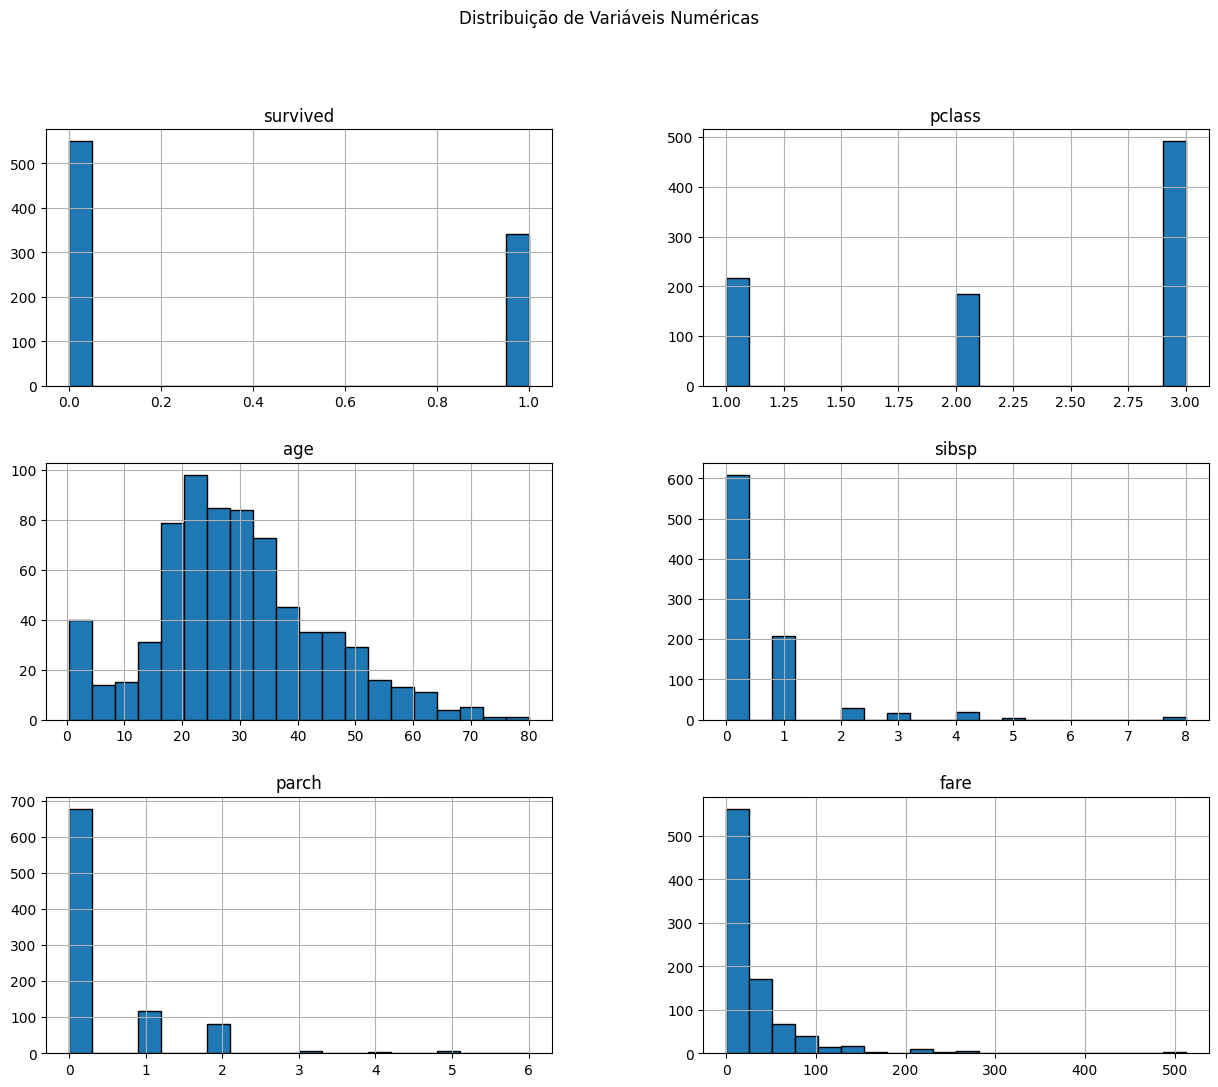

In [35]:
#plotando a distribuição das variáveis númericas
 #aqui é utilizado o histograma df.hist() com os parâmetros abaixo
#bins é o número de intervalos dentro da distribuição no plot.
#figsize() define o tamanho dos plots, o primeiro valor representa a largura e o segundo parâmetro representa a altura
#edgecolor='black' define a borda dos gráficos na cor black.
df.hist(bins=20, figsize=(15,12), edgecolor='black')
plt.suptitle("Distribuição de Variáveis Numéricas") #a função suptitle() serve para atribuirmos um título na parte superior do plot
plt.show() #começa a apresentação dos gráficos

Alguns insights que podemos ter com esse plot de histograma:
- Grande parte da população não sobreviveu; 
- Observando a distribuição dos passageiros pelas idades, podemos observar que grande parte estava na faixa etária entre 17~35;
- Se observarmos a quantidade pais/filhos (coluna parch) e cônjuges/irmãos (coluna sibsp), podemos afirmar que em sua maioria, estavam viajando solo.

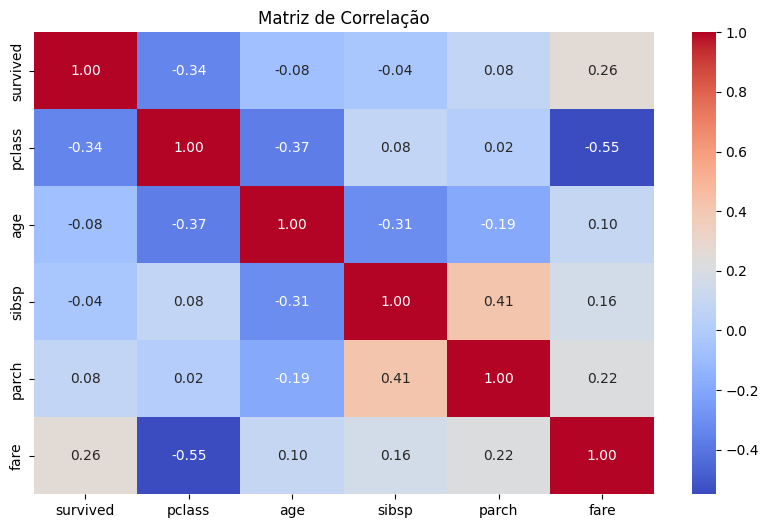

In [36]:
#Analisando a relação entre as variáveis
#para que possamos análisar, temos que pegarmos somente as colunas númericas
df_numeric = df.select_dtypes(include=['number']) #aqui selecionamos somente as colunas númericas
plt.figure(figsize=(10, 6)) #definimos o tamanho da figura
#o gráficop sns.heatmap() serve para plotarmos uma matriz de correlação para as variáveis númericas do dataframe
#o parâmetro annot=True adiciona os valores dentro de cada célula da matriz de correlação
#cmap='coolwarm' define o esquema de cores, variando do azul (valores negativos) até o vermelho (valores positivos)
#fmt='2.f' serve para definirmos os valores com duas casas decimais
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Matriz de Correlação") #aqui adicionamos um título
plt.show() #usamos o plt.show() para plotarmos o gráfico

Os valores exibidos nas células do mapa de calor representam o coeficiente da correlação de Pearson entre duas variáveis, o valor da correlação pode variar de -1 a 1.  
- 1: Correlação positiva perfeita (se uma variável aumenta, a outra também aumenta de forma proporcional).  
- -1: Correlação negativa perfeita (se uma variável aumenta, a outra diminui de forma proporcional).  
- 0: Nenhuma correlação (não há relação linear entre as variáveis)  

- Valores próximos de 1: Forte correlação positiva.  
- Valores próximos de -1: Forte correlação negativa.  
- Valores próximos de 0: Correlação fraca ou ausência de correlação linear.  

A diagonal principal da matriz (onde as variáveis se comparam consigo mesmas) sempre terá valores de 1 (correlação perfeita), porque qualquer variável tem uma correlação perfeita consigo mesma.  

Correlação positiva: Se duas variáveis têm uma correlação positiva forte (por exemplo, um valor próximo de 1), isso significa que à medida que uma variável aumenta, a outra também tende a aumentar. Por exemplo, a quantidade de horas estudadas e o desempenho em uma prova podem ter uma correlação positiva.

Correlação negativa: Se duas variáveis têm uma correlação negativa forte (por exemplo, um valor próximo de -1), isso significa que quando uma variável aumenta, a outra tende a diminuir. Por exemplo, a quantidade de horas assistindo televisão e o desempenho acadêmico podem ter uma correlação negativa.  

Nenhuma correlação: Se o valor de correlação é próximo de 0, isso significa que não há uma relação linear entre as duas variáveis. Por exemplo, o tamanho de uma pessoa e seu desempenho acadêmico podem não ter correlação.